In [1]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp '/content/drive/MyDrive/Colab Notebooks/cat_dog_dataset.zip' '/content/'

In [3]:
!unzip '/content/cat_dog_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: content/cat_dog_dataset/cat/cat.1018.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1817.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2224.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4839.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4055.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4851.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2483.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4127.jpg  
  inflating: content/cat_dog_dataset/cat/cat.3377.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4770.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1310.jpg  
  inflating: content/cat_dog_dataset/cat/cat.508.jpg  
  inflating: content/cat_dog_dataset/cat/cat.283.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1209.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1312.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2362.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4333.jpg  

In [4]:
import tensorflow as tf
#training data functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#model building functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [5]:
dataset_path='/content/content/cat_dog_dataset'

In [6]:
#Hyperparmeters
batch_size = 32
epochs =10
image_size =(150,150)


In [7]:
#normalisation + validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)

In [8]:
#training data generator
training_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary',
    subset = 'training'
)

Found 8000 images belonging to 2 classes.


In [9]:
#validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary',
    subset = 'validation'
)


Found 2000 images belonging to 2 classes.


In [10]:
#model
model=Sequential()

#convolutional layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))     #unit(filters,size,activation,input_shape=(x,y,c)=>based on image_size and c crspndng to rgb)

#pooling layer
model.add(MaxPooling2D(2,2))   #unit(pooling size)

#Faltten (Input layer)
model.add(Flatten())      #convertiong to 1D (150*150 nodes) =22500 pixles for unit

#Fully connected layer(hidden laye)
model.add(Dense(120,activation='relu'))

#Output layer
model.add(Dense(1,activation='sigmoid'))

#compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(training_generator,steps_per_epoch=training_generator.samples/batch_size,
                    validation_data=validation_generator,validation_steps=validation_generator.samples/batch_size,
                    epochs=epochs)

Epoch 1/10
250/250 [==============================] - 22s 73ms/step - loss: 0.8124 - accuracy: 0.6442 - val_loss: 0.5790 - val_accuracy: 0.6975
Epoch 2/10
250/250 [==============================] - 21s 84ms/step - loss: 0.4619 - accuracy: 0.7868 - val_loss: 0.5820 - val_accuracy: 0.7080
Epoch 3/10
250/250 [==============================] - 18s 71ms/step - loss: 0.3353 - accuracy: 0.8627 - val_loss: 0.5993 - val_accuracy: 0.6980
Epoch 4/10
250/250 [==============================] - 18s 72ms/step - loss: 0.1984 - accuracy: 0.9283 - val_loss: 0.6970 - val_accuracy: 0.6990
Epoch 5/10
250/250 [==============================] - 18s 70ms/step - loss: 0.1149 - accuracy: 0.9625 - val_loss: 0.8163 - val_accuracy: 0.6855
Epoch 6/10
250/250 [==============================] - 20s 82ms/step - loss: 0.0692 - accuracy: 0.9824 - val_loss: 1.0009 - val_accuracy: 0.6780
Epoch 7/10
250/250 [==============================] - 18s 73ms/step - loss: 0.0536 - accuracy: 0.9874 - val_loss: 1.1747 - val_accuracy:

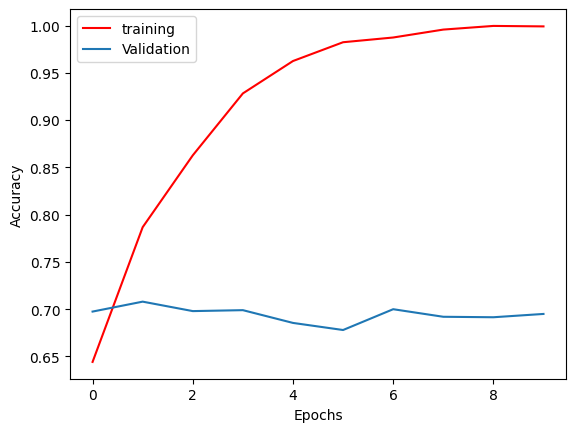

In [30]:
# prompt: plot graph of loss and accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','Validation'])




Text(0, 0.5, 'Accuracy')

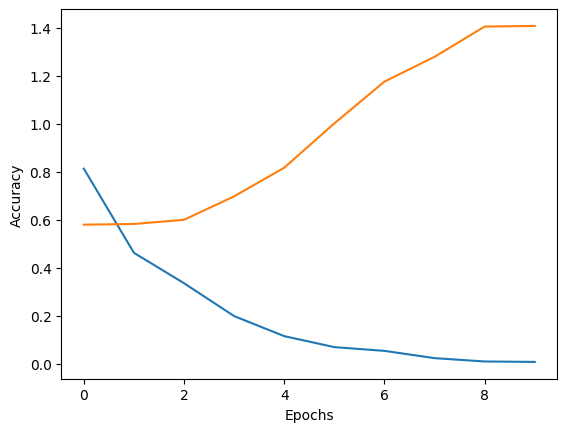

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [34]:
#model 2 building
model2=Sequential()

#convolutional layer
model2.add(Conv2D(64,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))     #unit(filters,size,activation,input_shape=(x,y,c)=>based on image_size and c crspndng to rgb)
model2.add(Conv2D(128,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))

#pooling layer
model2.add(MaxPooling2D(2,2))   #unit(pooling size)

#Faltten (Input layer)
model2.add(Flatten())      #convertiong to 1D (150*150 nodes) =22500 pixles for unit

#Fully connected layer(hidden laye)
model2.add(Dense(128,activation='relu'))

#Output layer
model2.add(Dense(1,activation='sigmoid'))

#compile
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [35]:
history2= model2.fit(training_generator,steps_per_epoch=training_generator.samples/batch_size,
                    validation_data=validation_generator,validation_steps=validation_generator.samples/batch_size,
                    epochs=epochs)

Epoch 1/10
250/250 [==============================] - 33s 125ms/step - loss: 0.9341 - accuracy: 0.5599 - val_loss: 0.6602 - val_accuracy: 0.5965
Epoch 2/10
250/250 [==============================] - 32s 126ms/step - loss: 0.5930 - accuracy: 0.6883 - val_loss: 0.6432 - val_accuracy: 0.6540
Epoch 3/10
250/250 [==============================] - 31s 126ms/step - loss: 0.4078 - accuracy: 0.8069 - val_loss: 0.7006 - val_accuracy: 0.6550
Epoch 4/10
250/250 [==============================] - 31s 126ms/step - loss: 0.1762 - accuracy: 0.9333 - val_loss: 0.9587 - val_accuracy: 0.6750
Epoch 5/10
250/250 [==============================] - 33s 131ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 1.3492 - val_accuracy: 0.6675
Epoch 6/10
250/250 [==============================] - 31s 124ms/step - loss: 0.0160 - accuracy: 0.9964 - val_loss: 1.7517 - val_accuracy: 0.6625
Epoch 7/10
250/250 [==============================] - 31s 125ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 2.3788 - val_ac

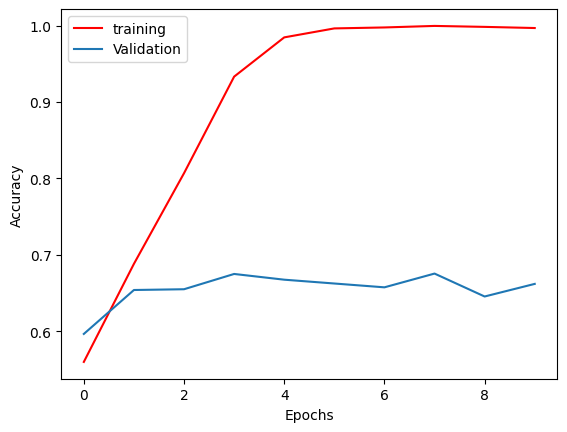

In [36]:

plt.plot(history2.history['accuracy'],color='red')
plt.plot(history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','Validation'])



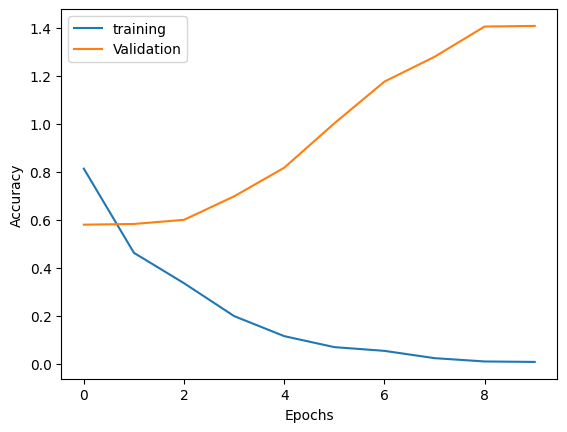

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','Validation'])

In [38]:
model.save('cat_dog_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [48]:
def predict_image(image_path):
  img=image.load_img(image_path,target_size=image_size)   #load image
  img=image.img_to_array(img)  #converting to array
  img=np.expand_dims(img,axis=0)   #expanding dimension to match with model
  img/=255.0 #normslize image pixels

  result=model.predict(img)

  return 'Cat' if result<0.5 else 'Dog'


In [49]:
predict_image('/content/cat.jpeg')

1/1 [==============================] - 0s 147ms/step


'Cat'

In [50]:
predict_image('/content/cat2.jpeg')

1/1 [==============================] - 0s 17ms/step


'Dog'

In [51]:
predict_image('/content/dog1.jpeg')

1/1 [==============================] - 0s 18ms/step


'Dog'

In [52]:
predict_image('/content/dog2.jpeg')

1/1 [==============================] - 0s 16ms/step


'Cat'

In [53]:
predict_image('/content/content/cat_dog_dataset/cat/cat.1.jpg')

1/1 [==============================] - 0s 17ms/step


'Cat'

In [54]:
predict_image('/content/content/cat_dog_dataset/dog/dog.1.jpg')

1/1 [==============================] - 0s 28ms/step


'Dog'